#### Working notebook to plot the probabilities estimated at sample grids for various predictors

In [1]:
%who

Interactive namespace is empty.


In [10]:
import xarray as xr
import numpy as np
import pandas as pd
import pickle

# select some thresholds to look at
threshList = [50, 100, 150]

# select some lat-lons to look at
latList = [-34, -34, -34, -37, -37, -37]
lonList = [148, 145, 142, 148, 145, 142]

# select some timescales for analysis
ts = [2, 6, 8, 12]

varname = 'PminusE'

predSel = ['season', 'soi', 'dmi']
climMode1 = predSel[1]
climMode2 = predSel[2]
climModes = predSel[1:]

In [17]:
# Read the saved pickle files

out_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

file_pvalues = out_dir + varname + '_lgR_pvalues.pkl'
file_params = out_dir + varname + '_lgR_params.pkl'
file_pred = out_dir + varname + '_lgR_pred.pkl'

with open(file_pvalues, 'rb') as f:
    lgR_pvalues_list = pickle.load(f)
    
with open(file_params, 'rb') as f:
    lgR_params_list = pickle.load(f)
    
with open(file_pred, 'rb') as f:
    lgR_pred_list = pickle.load(f)
    
# rewriting numerical SOI and DMI values with text descriptions

test_df_all = [pd.concat(list(i.values())) for i in lgR_pred_list]
mode_labels = ['-ve', 'neutral', '+ve']

# Remap the values of the dataframe
test_df_forplot = []
for i in test_df_all:
    soi_dict = dict(zip(np.unique(i[climMode1]), mode_labels))
    dmi_dict = dict(zip(np.unique(i[climMode2]), mode_labels))
    test_df_forplot.append(i.replace({climMode1: soi_dict, climMode2: dmi_dict}))

# combining data at all timescales
master_df_forplot = pd.concat(test_df_forplot)

ts = np.unique(master_df_forplot['timescale'])
ts_dict = dict(zip(ts, [str(i) + '-weeks' for i in ts]))
master_df_forplot = master_df_forplot.replace({'timescale': ts_dict})

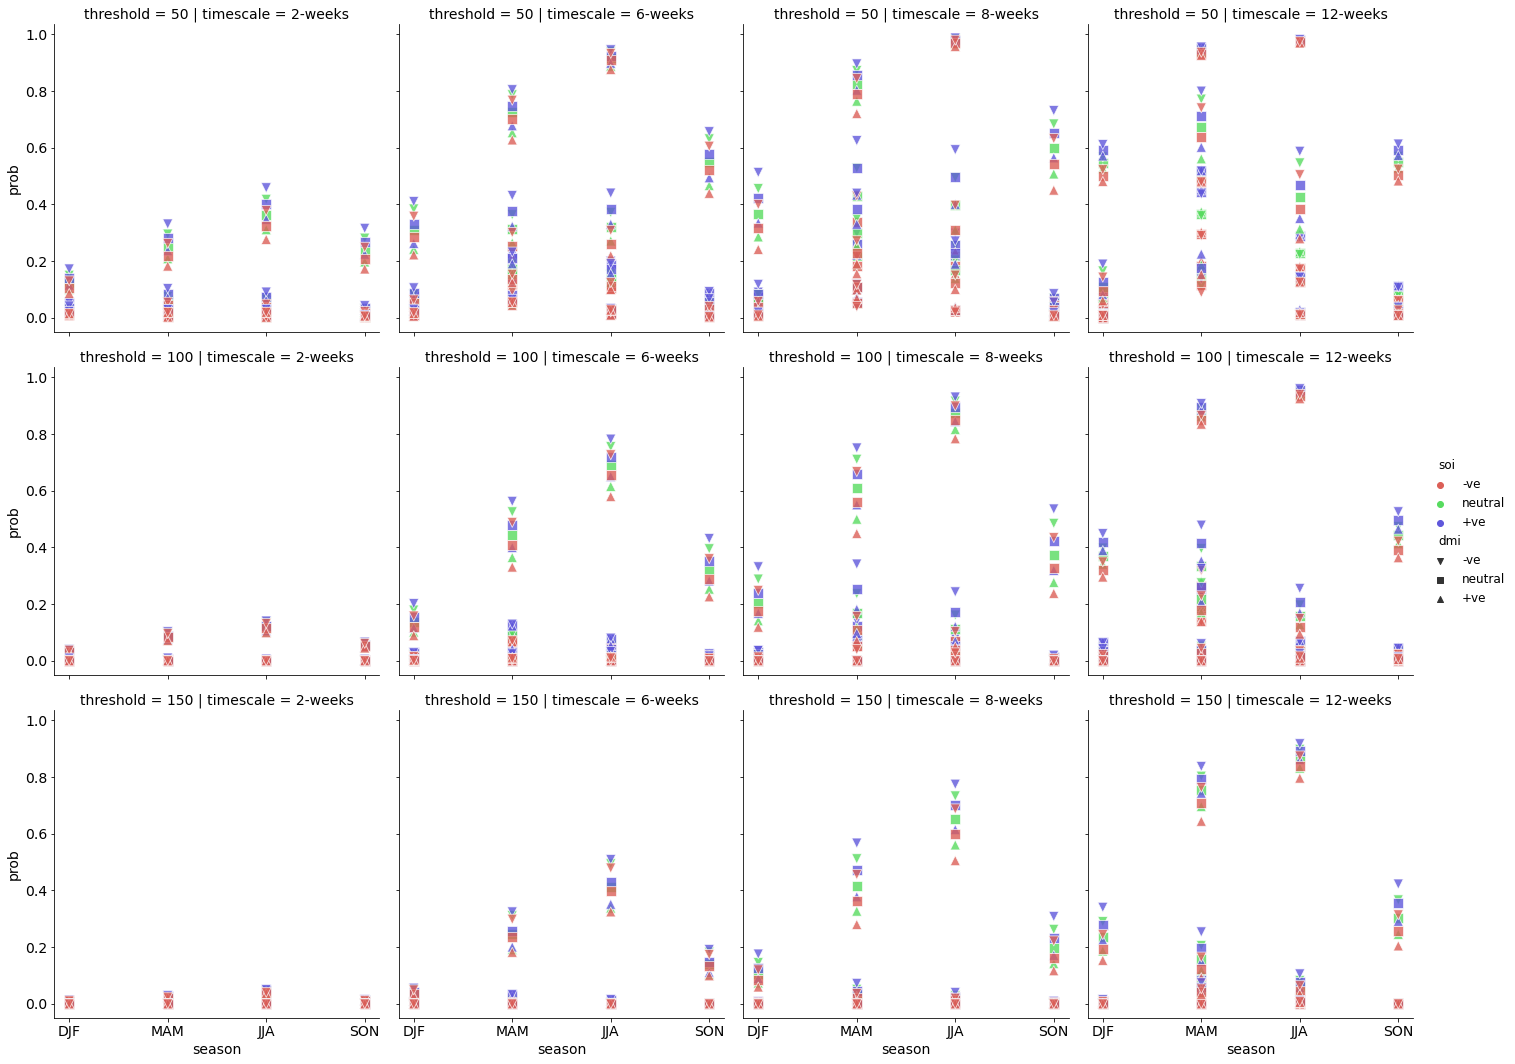

In [4]:
# results for two climate modes together for all grid points. The plots have too much information, not used.

import seaborn as sns
import matplotlib.pyplot as plt

SMALLEST = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALLEST)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLEST)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors = sns.color_palette("hls", 3) #['red', 'orange', 'dodgerblue']

sns.relplot(data=master_df_forplot, x="season", y="prob", hue=climMode1, style=climMode2, palette = colors, s=100, markers=['v','s', '^'], x_jitter=10, alpha=0.8, \
            style_order=mode_labels, hue_order=mode_labels, row="threshold", col="timescale")

#sns.relplot(data=test_df_forplot[0], x="season", y="prob", hue="soi", style="dmi", s=150, palette=sns.color_palette("coolwarm", as_cmap=True), markers=['o','s', '^'], x_jitter=0.3, alpha=0.8)

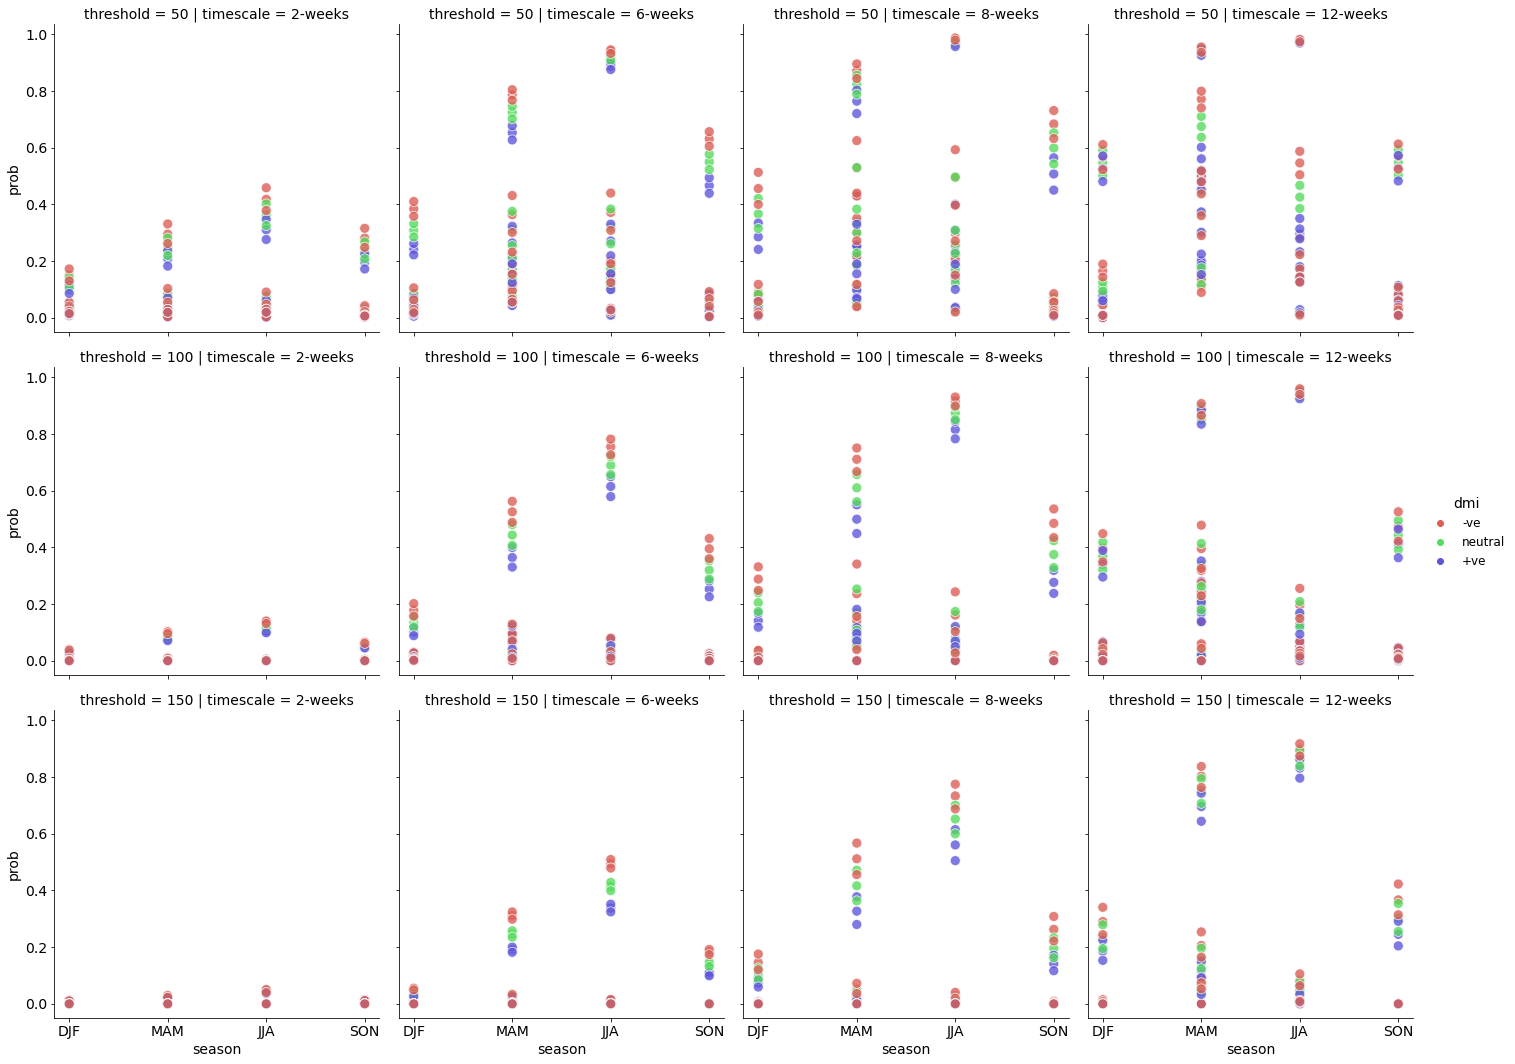

In [5]:
# Same as above, but one predictor and multiple grid points - again too much information to comprehend

import seaborn as sns
import matplotlib.pyplot as plt

SMALLEST = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALLEST)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLEST)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors = sns.color_palette("hls", 3) #['red', 'orange', 'dodgerblue']

sns.relplot(data=master_df_forplot, x="season", y="prob", hue=climMode2, palette = colors, s=100, markers=['v','s', '^'], x_jitter=10, alpha=0.8, \
            hue_order=mode_labels, row="threshold", col="timescale")

#sns.relplot(data=test_df_forplot[0], x="season", y="prob", hue="soi", style="dmi", s=150, palette=sns.color_palette("coolwarm", as_cmap=True), markers=['o','s', '^'], x_jitter=0.3, alpha=0.8)

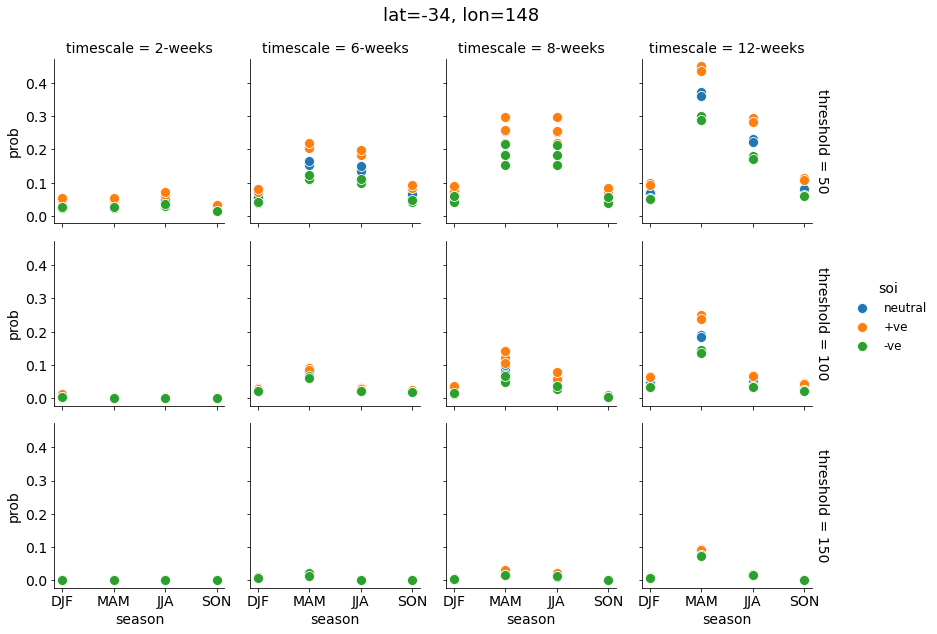

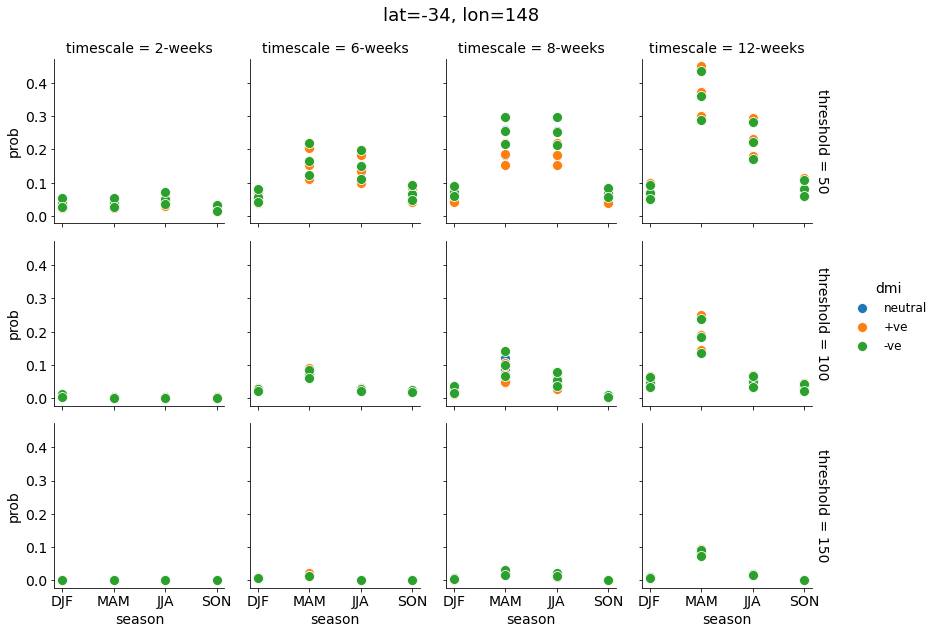

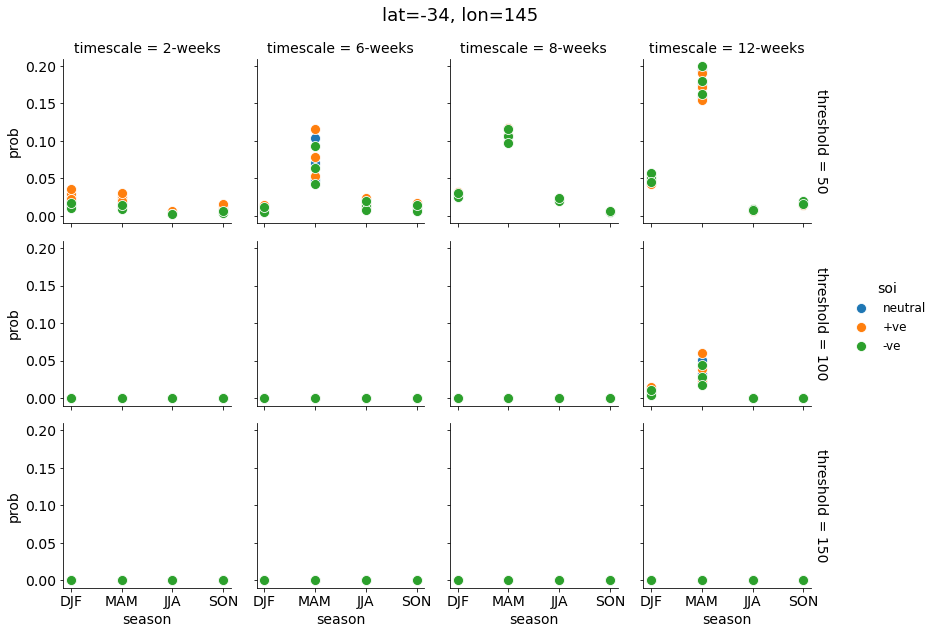

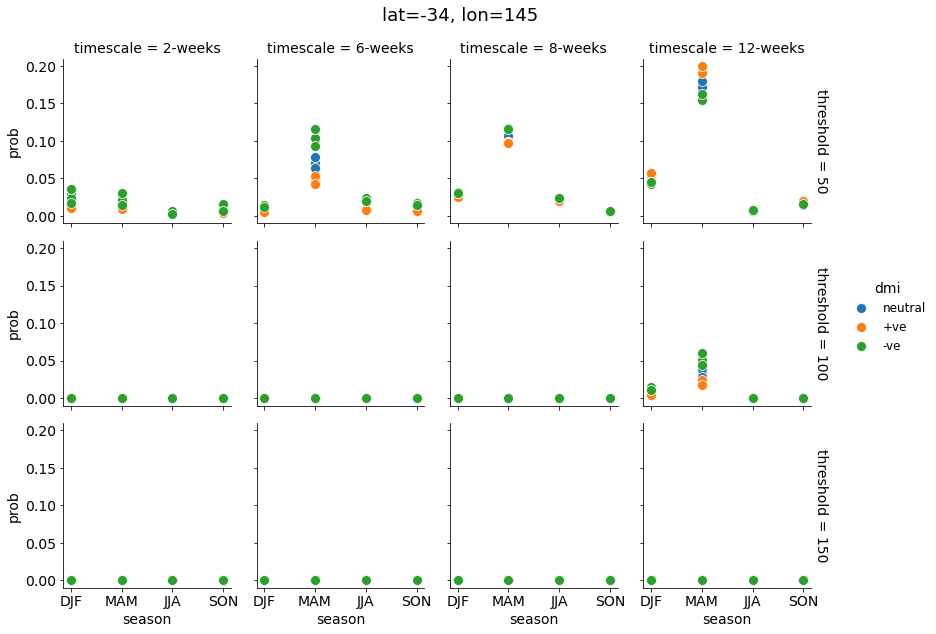

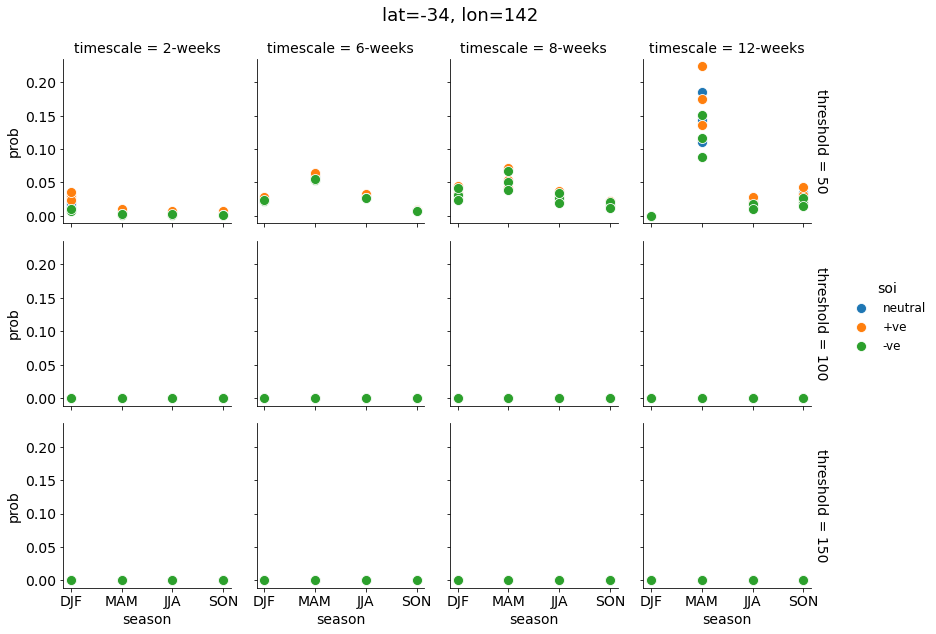

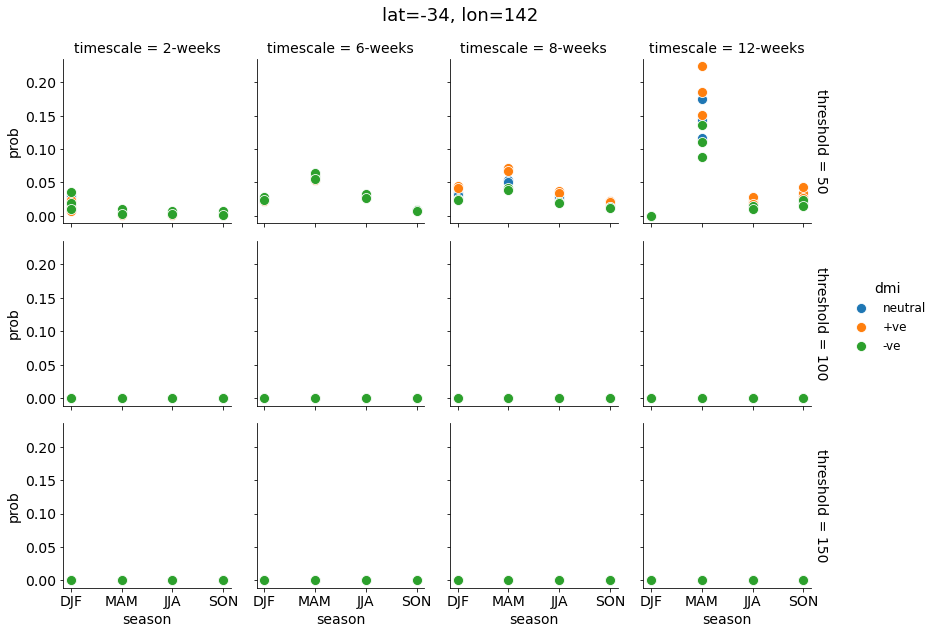

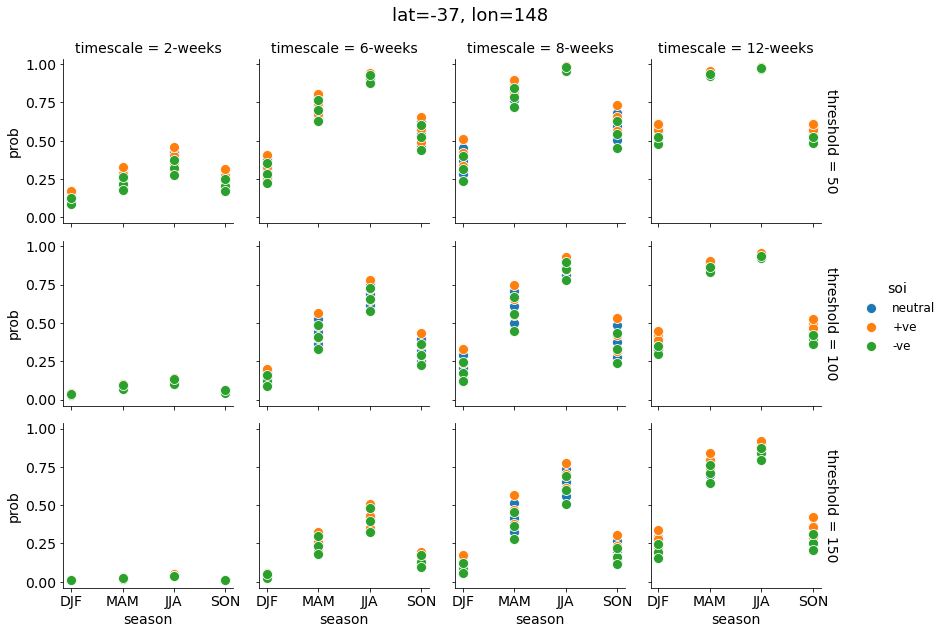

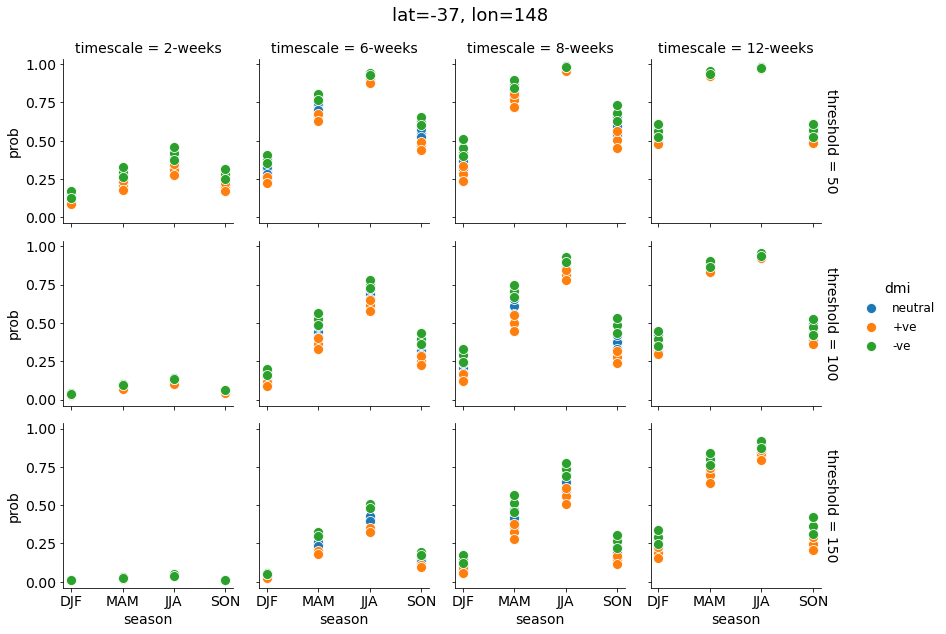

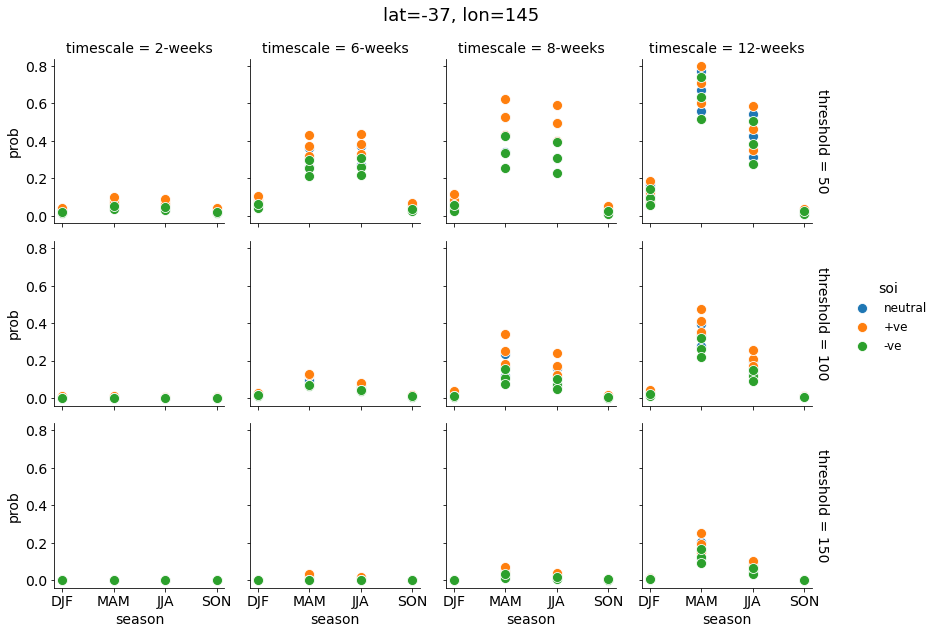

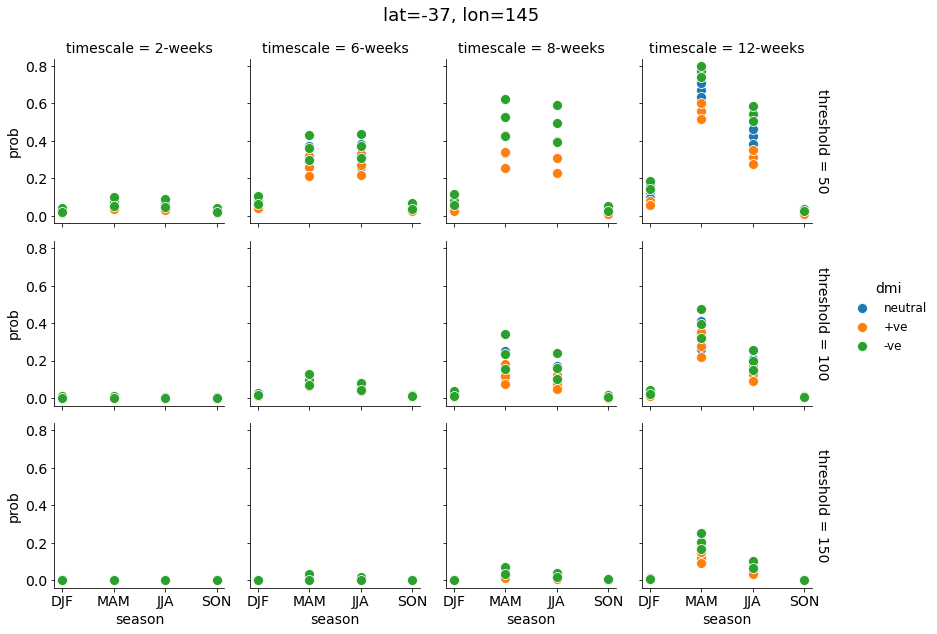

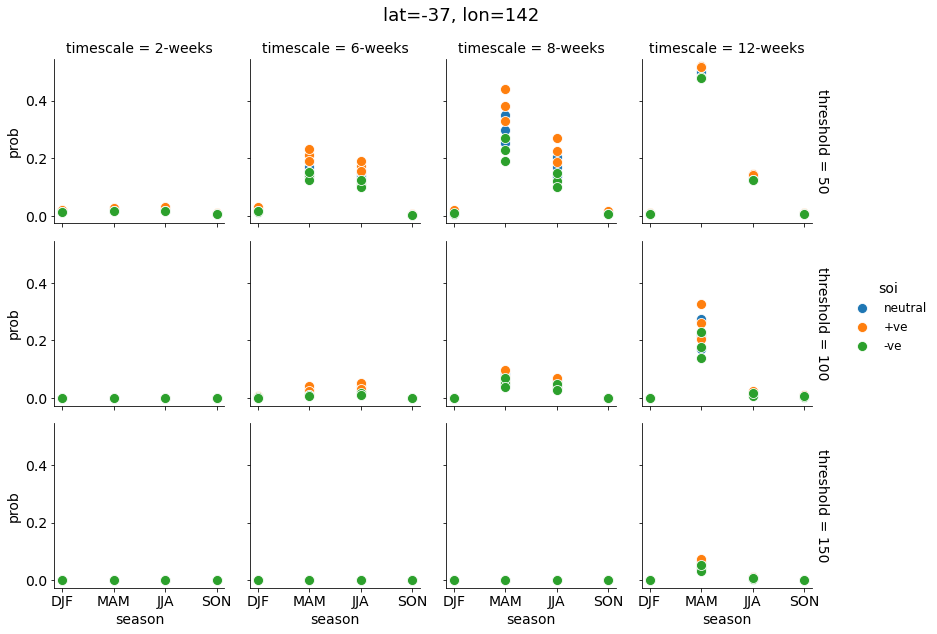

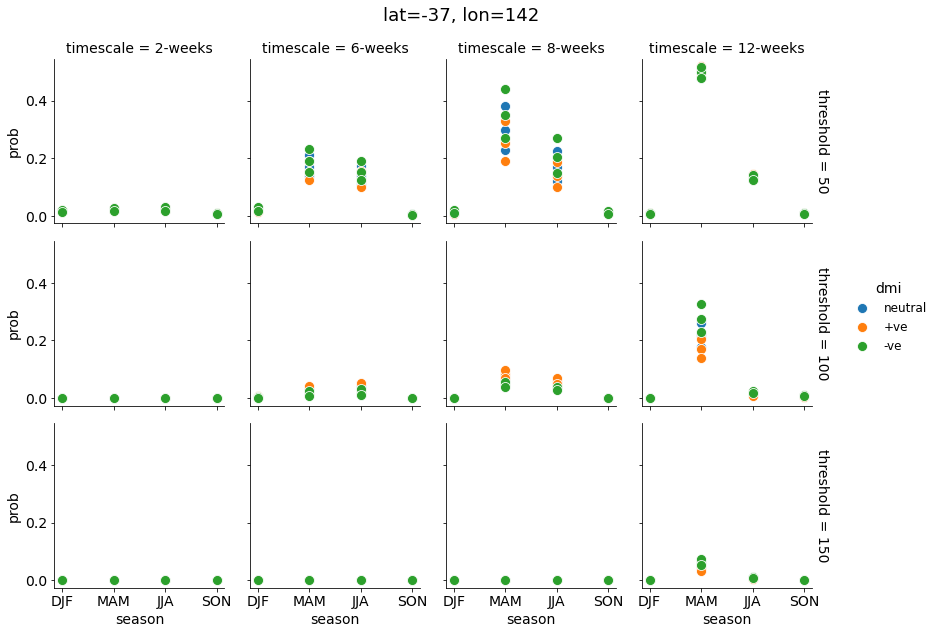

In [14]:
latList = [-34, -34, -34, -37, -37, -37]
lonList = [148, 145, 142, 148, 145, 142]

figdir = 'figures/prob_logiReg/'

for iPt in np.arange(len(latList)):
    for iMode in np.arange(len(climModes)):

        figname = varname + '_lat' + str(latList[iPt]) + '_lon' + str(lonList[iPt]) + '_logReg_prob_' + climModes[iMode] + '.png'

        df_subset = master_df_forplot[(master_df_forplot['lat']==latList[iPt]) & (master_df_forplot['lon']==lonList[iPt])]

        g = sns.FacetGrid(df_subset, row="threshold", col="timescale", hue=climModes[iMode], margin_titles=True)
        g.map(sns.scatterplot, "season", "prob", x_jitter=10, s = 100)
        g.add_legend()
        g.fig.set_size_inches(13.2, 9)
        g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
        g.fig.suptitle('lat=' + str(latList[iPt]) + ', lon=' + str(lonList[iPt]))

        plt.savefig(figdir+figname)

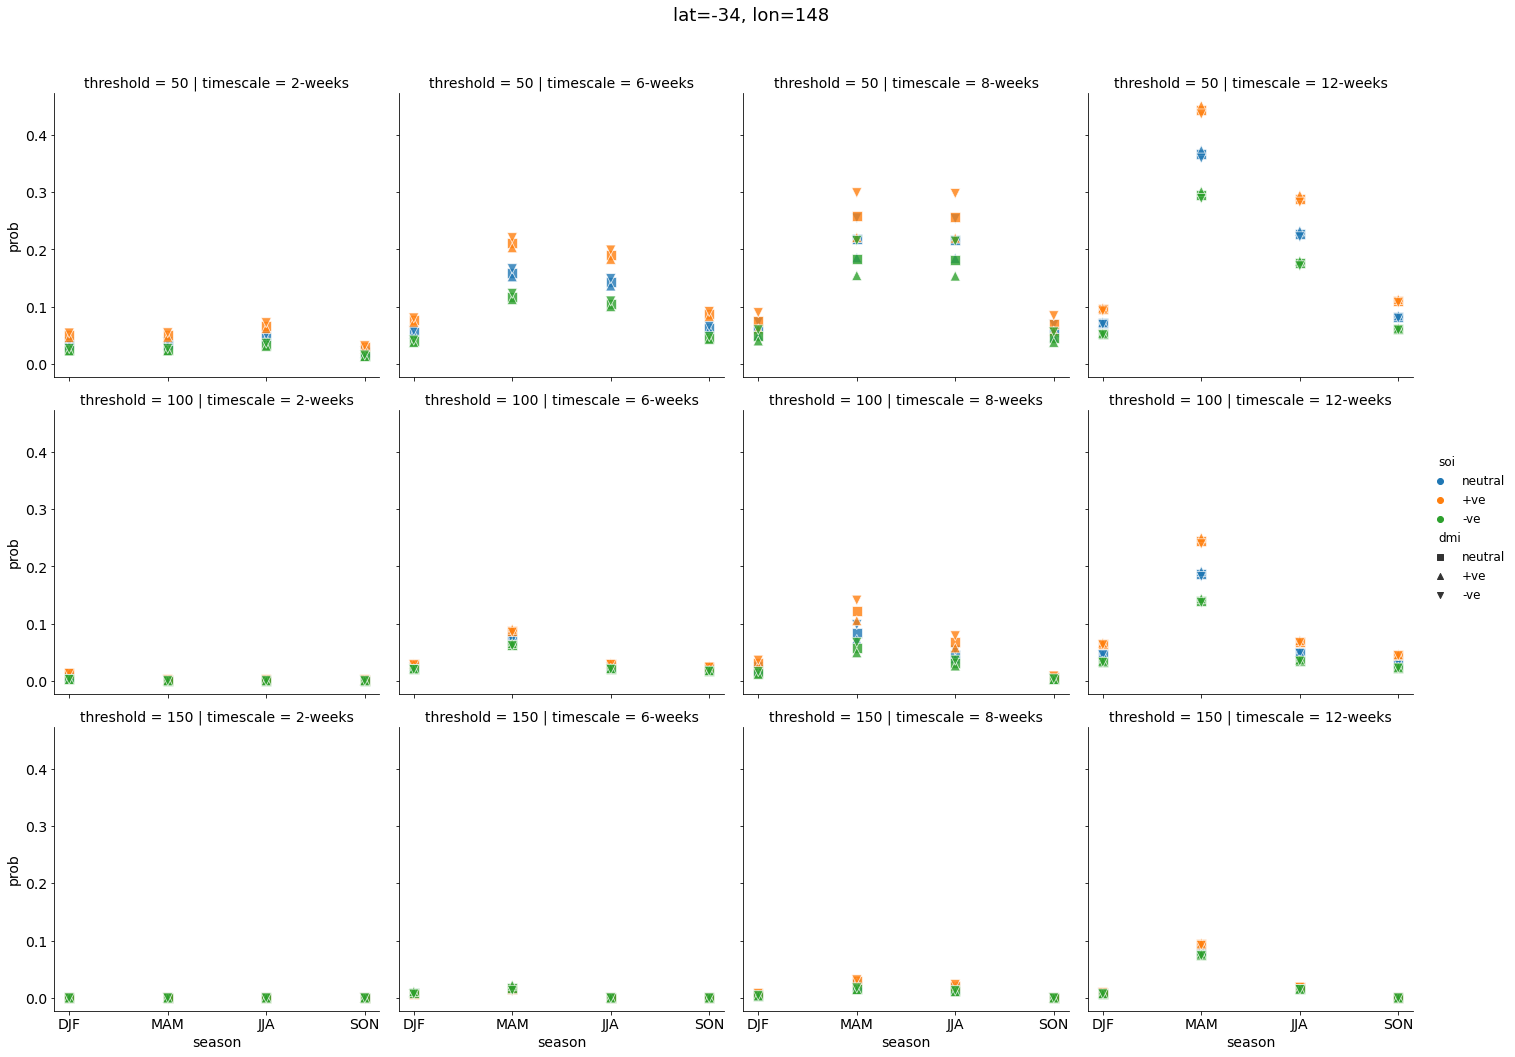

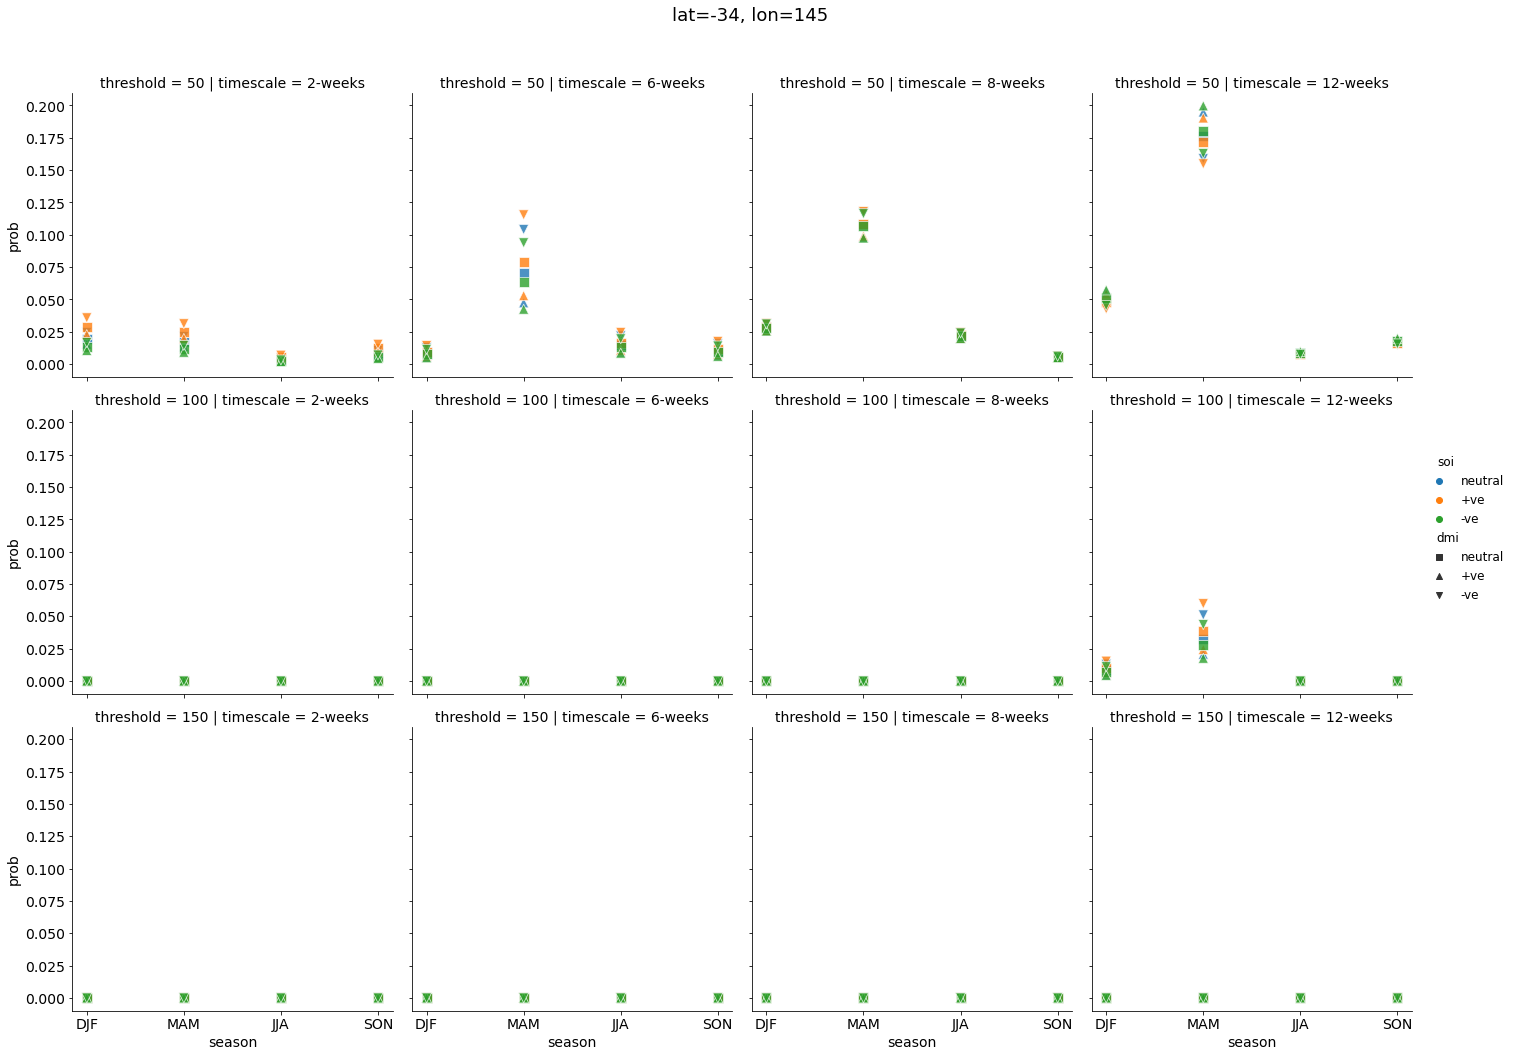

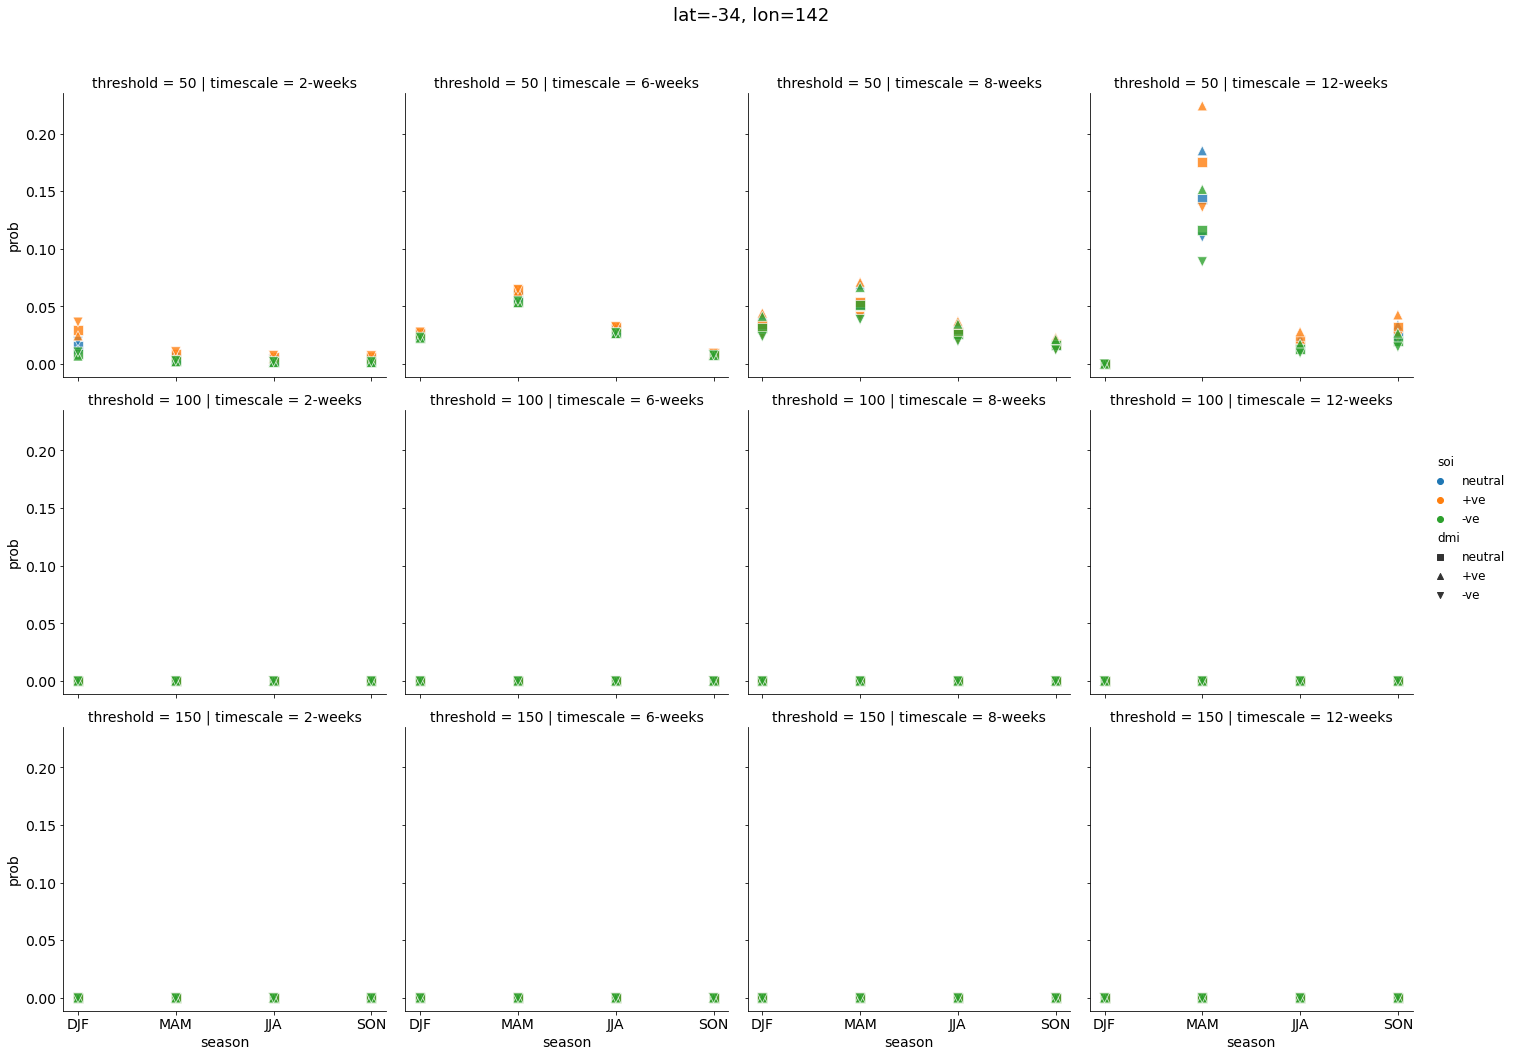

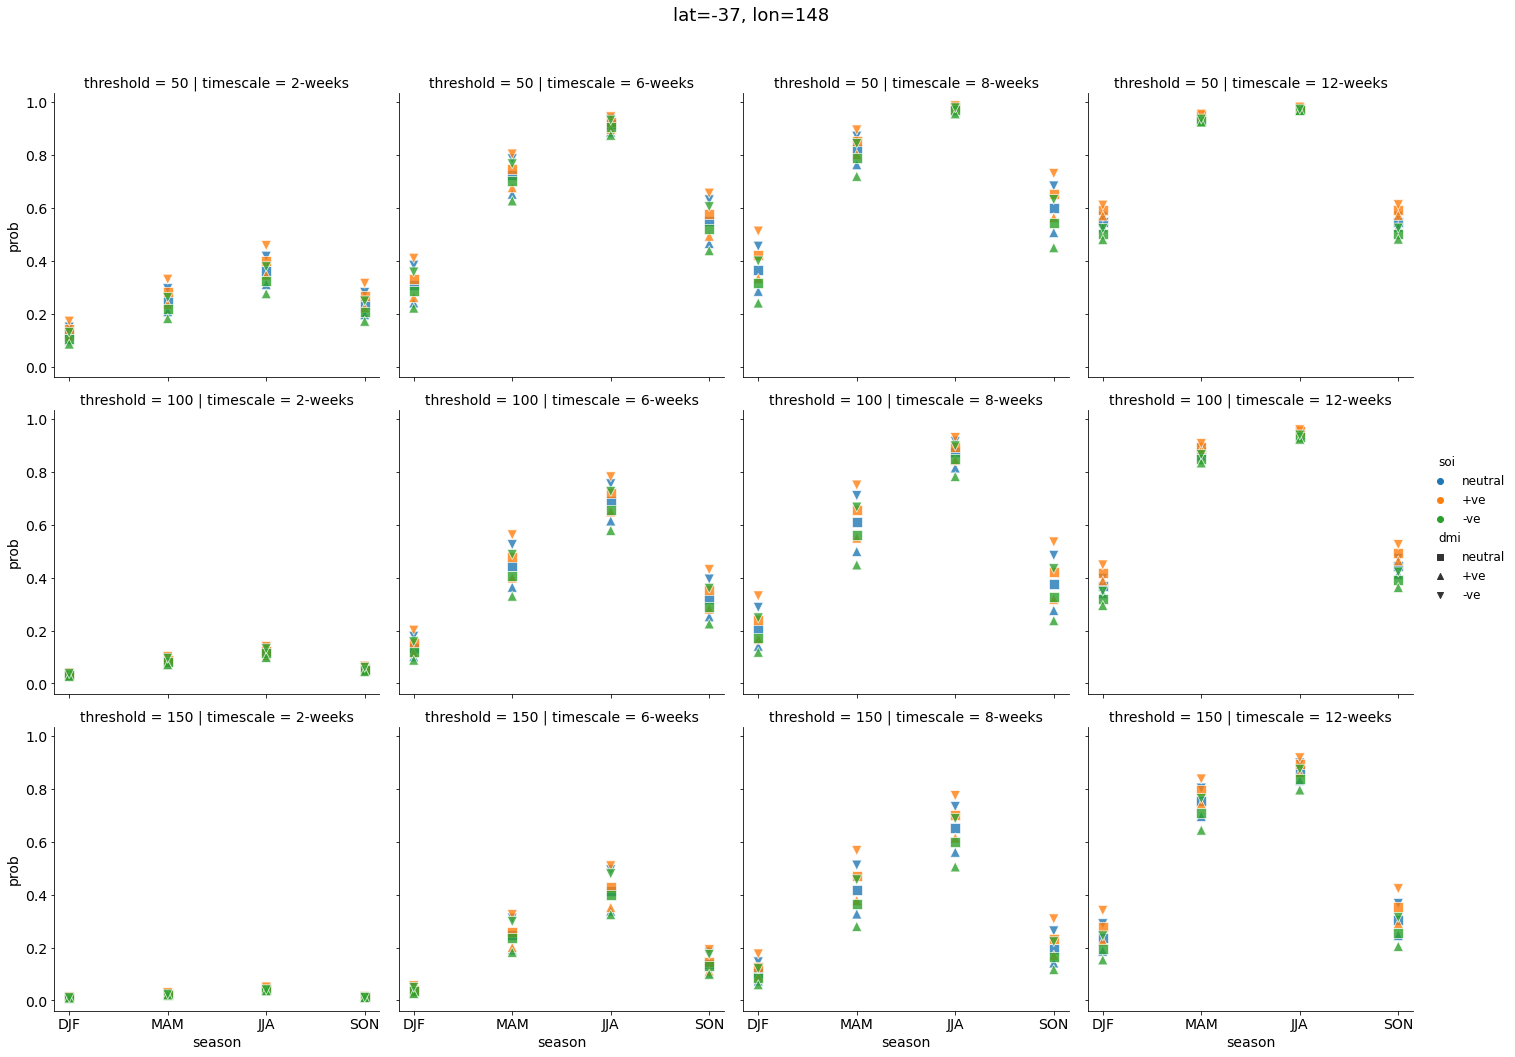

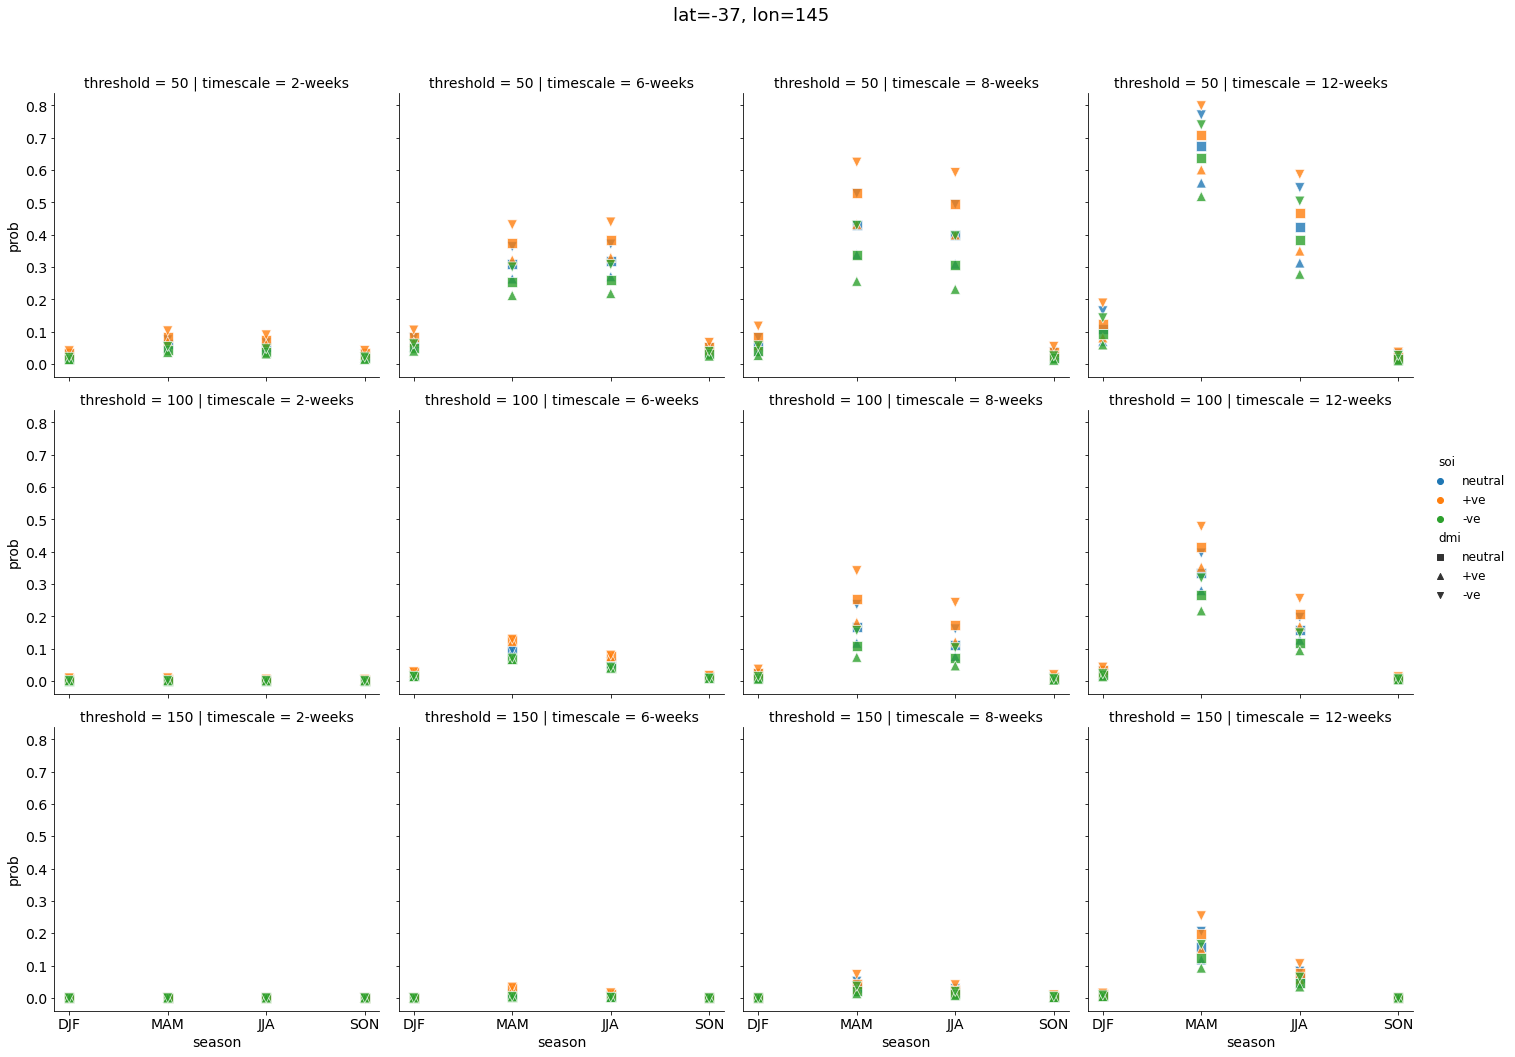

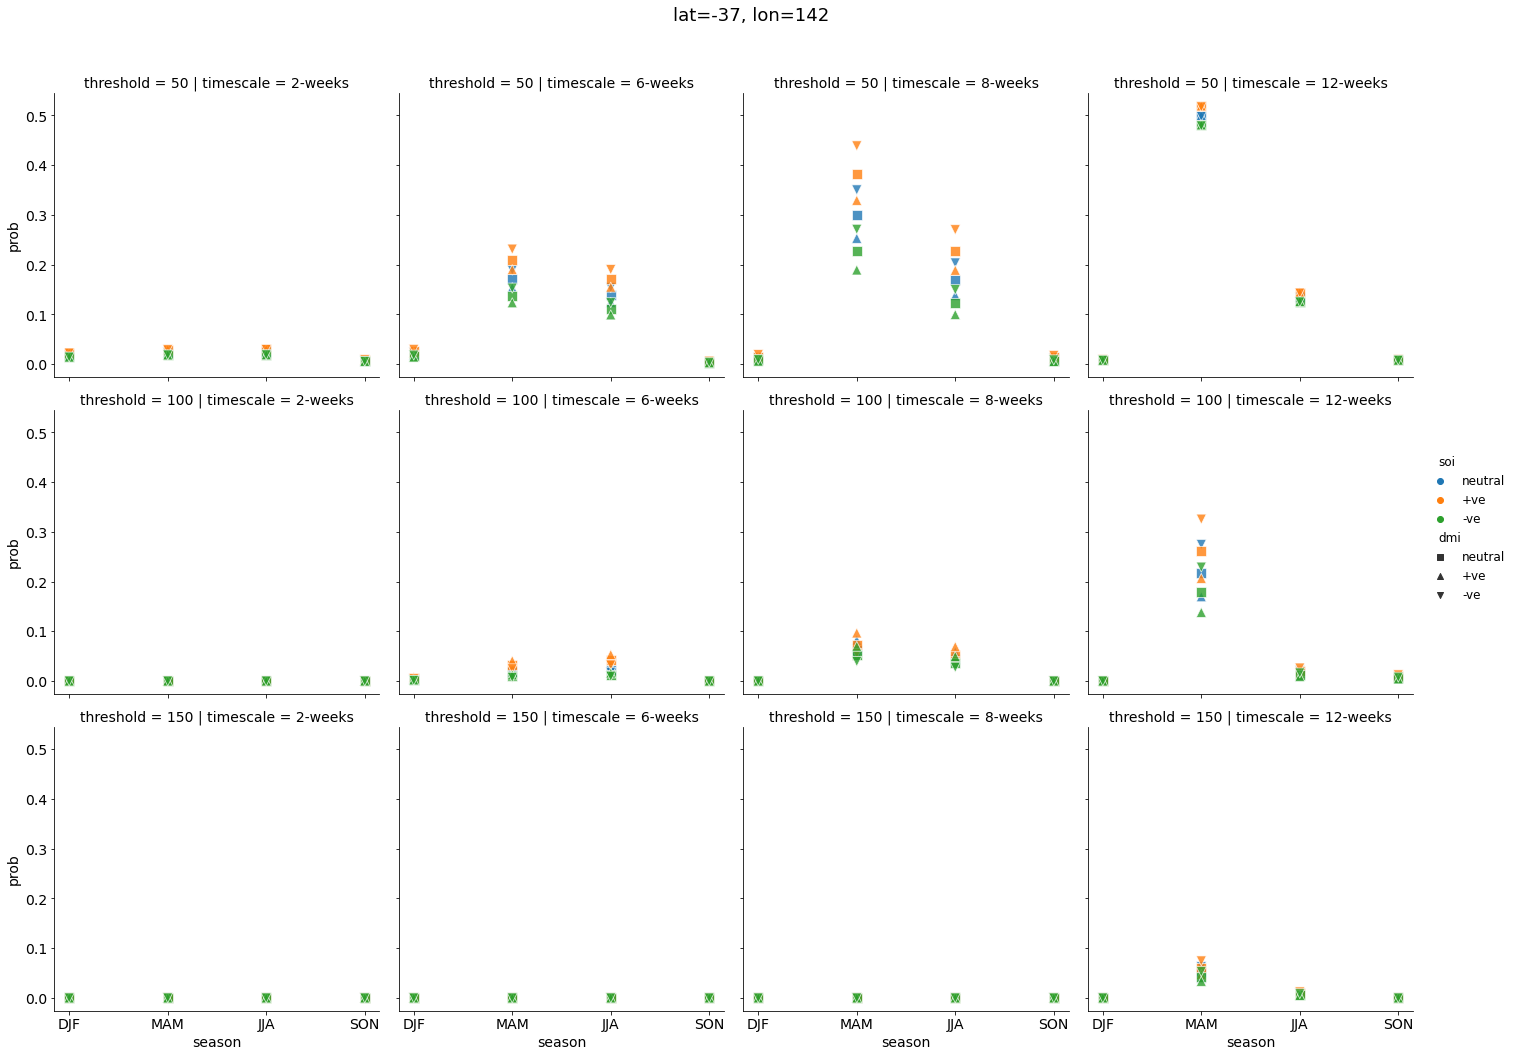

In [16]:

figdir = 'figures/prob_logiReg/'

for iPt in np.arange(len(latList)):

    figname = varname + '_lat' + str(latList[iPt]) + '_lon' + str(lonList[iPt]) + '_logReg_prob_bothModes.png'

    df_subset = master_df_forplot[(master_df_forplot['lat']==latList[iPt]) & (master_df_forplot['lon']==lonList[iPt])]
    g2 = sns.relplot(data=df_subset, x="season", y="prob", hue="soi", style="dmi", s=100, markers=['s', '^', 'v'], x_jitter=10, alpha=0.8, \
                row="threshold", col="timescale")
    g2.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g2.fig.suptitle('lat=' + str(latList[iPt]) + ', lon=' + str(lonList[iPt]))
    plt.savefig(figdir+figname)
